In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D

In [2]:
import matplotlib.pyplot as plt

In [3]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [4]:
!kaggle datasets download emirhanai/planets-and-moons-dataset-ai-in-space

Dataset URL: https://www.kaggle.com/datasets/emirhanai/planets-and-moons-dataset-ai-in-space
License(s): CC-BY-NC-SA-4.0
  0% 0.00/46.4M [00:00<?, ?B/s]
100% 46.4M/46.4M [00:00<00:00, 1.37GB/s]


In [5]:
import zipfile
zip=zipfile.ZipFile('/content/planets-and-moons-dataset-ai-in-space.zip','r')
zip.extractall()
zip.close()

In [6]:
train_data=tf.keras.utils.image_dataset_from_directory(
    directory='/content/Planets_Moons_Data/Planets and Moons',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(224,224),
    shuffle=True
)

Found 1638 files belonging to 11 classes.


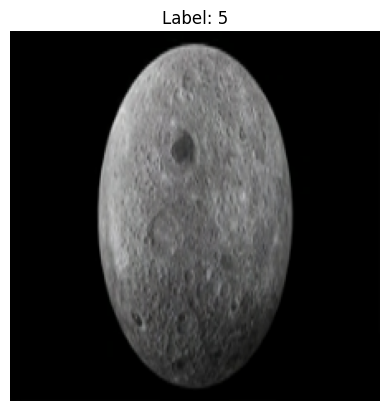

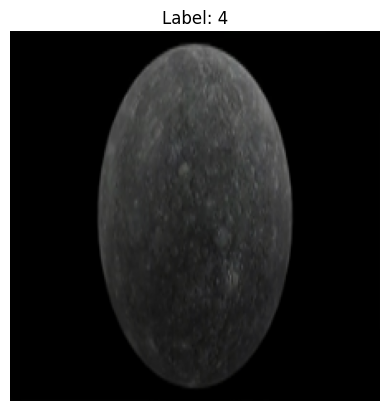

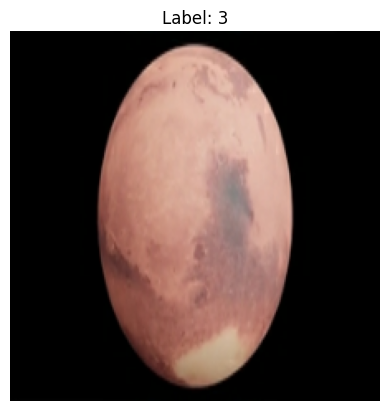

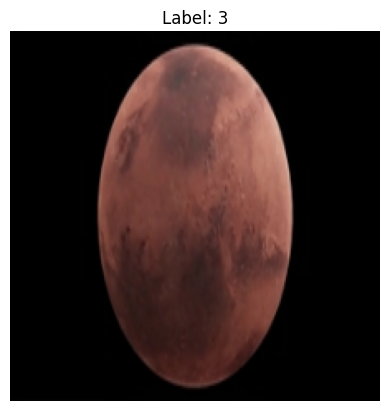

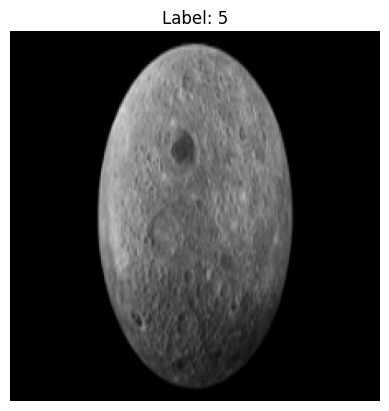

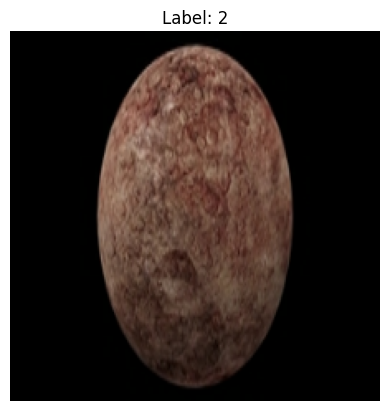

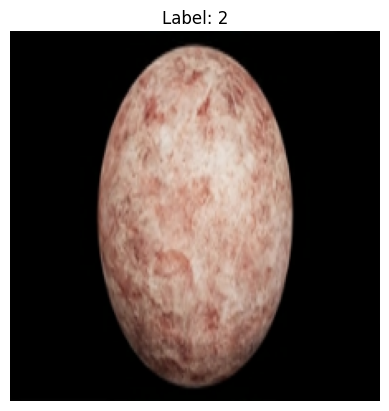

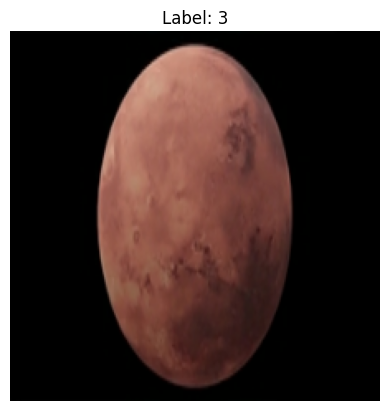

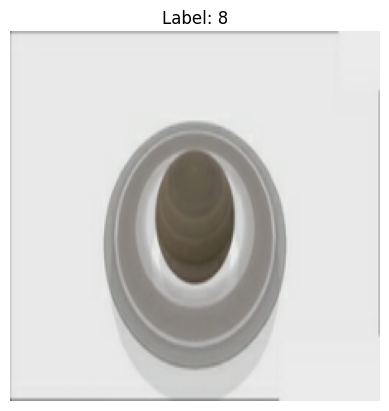

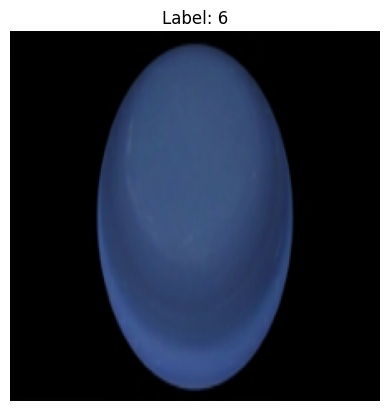

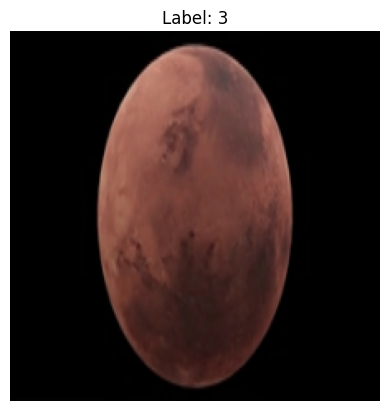

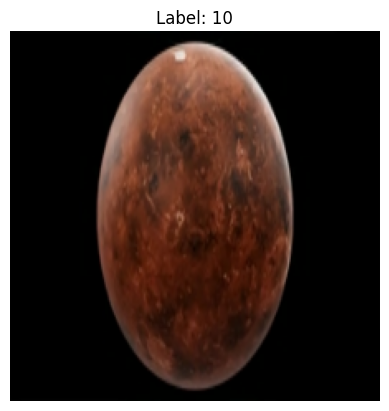

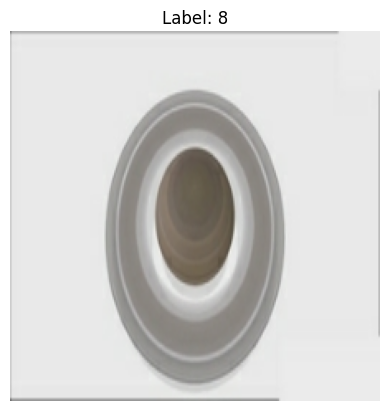

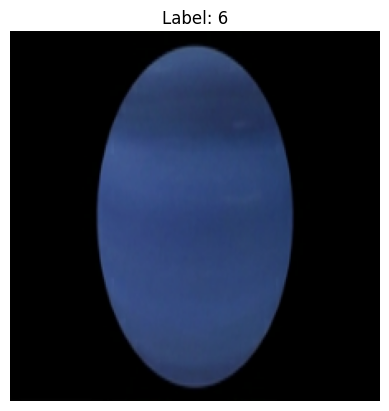

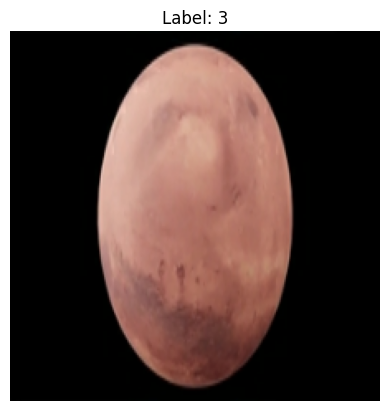

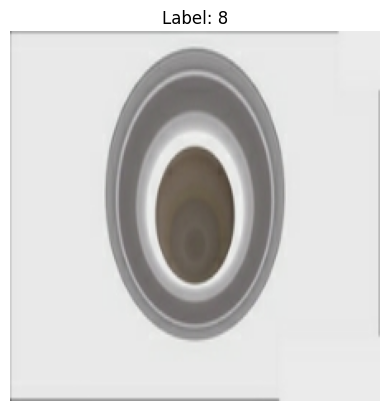

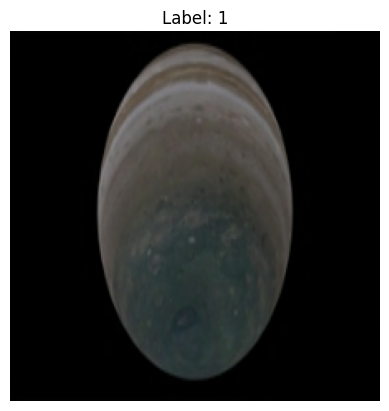

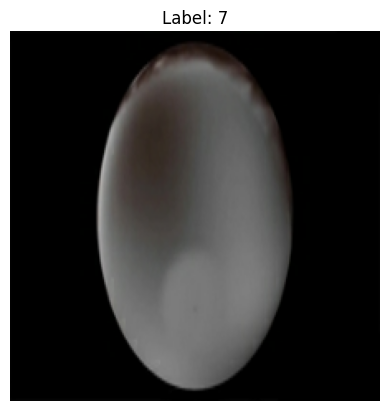

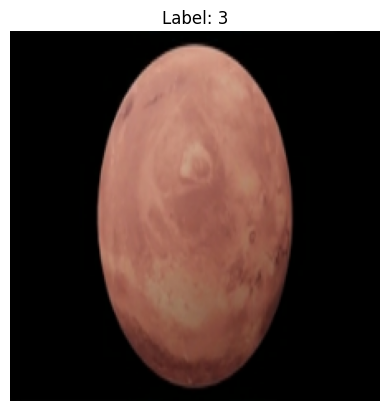

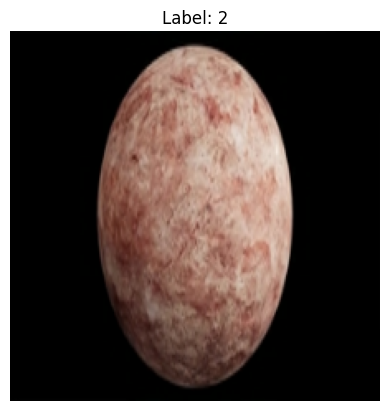

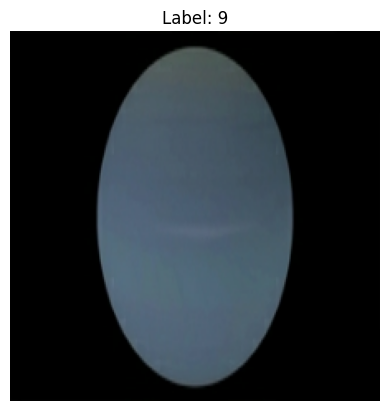

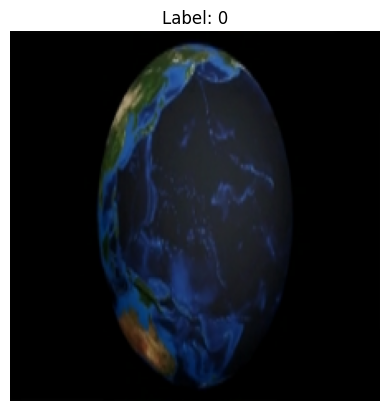

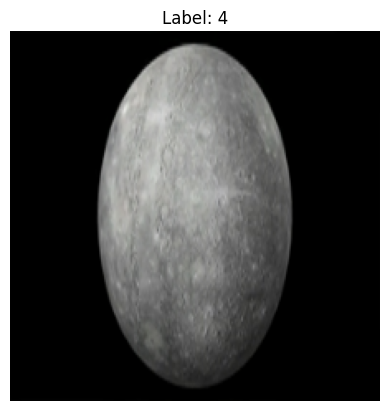

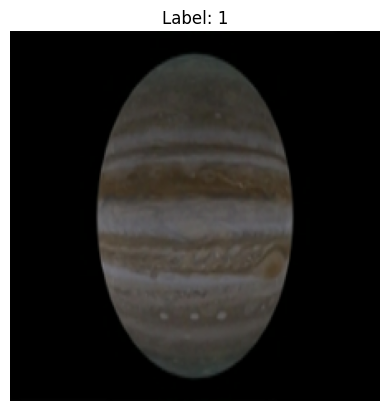

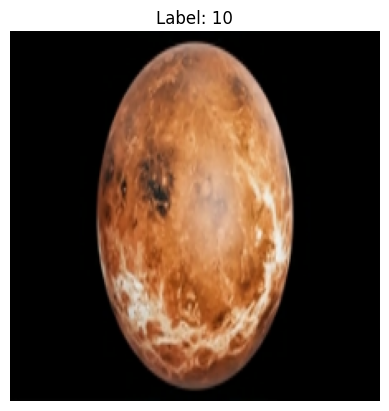

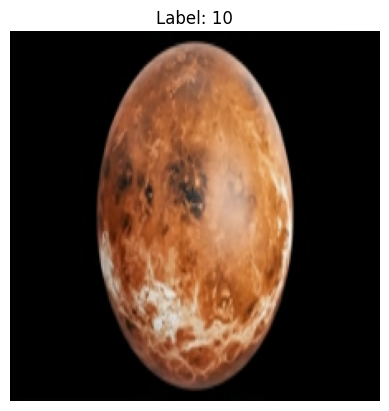

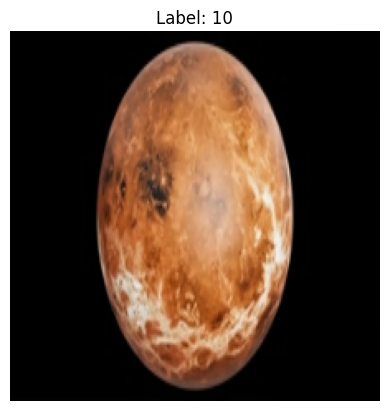

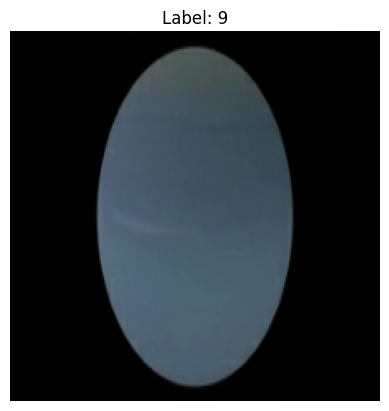

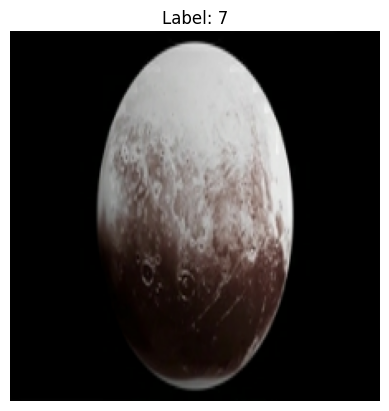

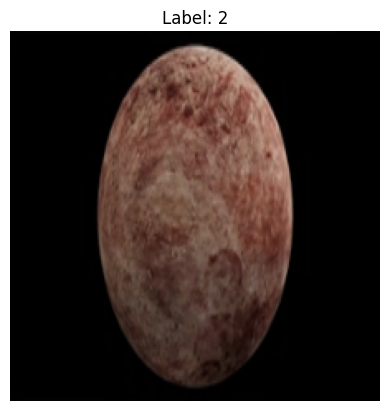

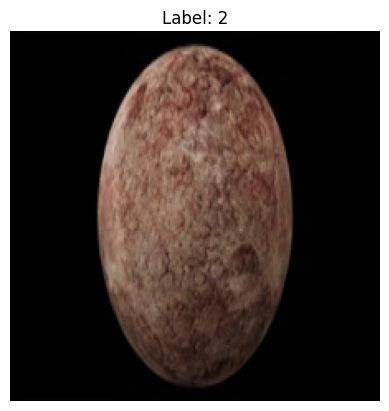

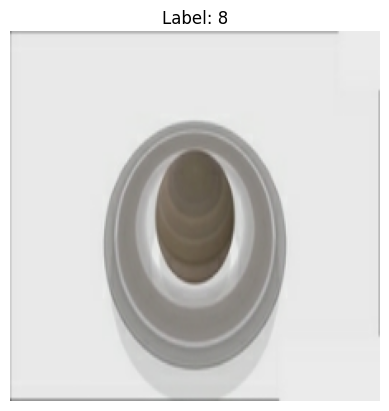

In [7]:
for images, labels in train_data.take(1):  # Take one batch
    for i in range(len(images)):
      image=images[i]
      label=labels[i]
      plt.imshow(image.numpy().astype("uint8"))
      plt.title(f"Label: {label.numpy()}")
      plt.axis('off')
      plt.show()

In [8]:
print(train_data.class_names)

['Earth', 'Jupiter', 'MakeMake', 'Mars', 'Mercury', 'Moon', 'Neptune', 'Pluto', 'Saturn', 'Uranus', 'Venus']


In [9]:
def process(image,label):
  image=tf.cast(image/255.0,tf.float32)
  return image,label

In [10]:
train_data=train_data.map(process)

In [87]:
model=Sequential([

    Conv2D(32,(3,3),activation='relu',input_shape=(224,224,3)),
    MaxPooling2D((2,2),strides=2,padding='valid'),
    Conv2D(64,(3,3),activation='relu'),
    MaxPooling2D((2,2),strides=2,padding='valid'),
    Conv2D(128,(3,3),activation='relu'),
    MaxPooling2D((2,2),strides=2,padding='valid'),
    Conv2D(256,(3,3),activation='relu'),
    MaxPooling2D((2,2),strides=2,padding='valid'),
    Flatten(),
    Dense(32,activation='relu'),
    Dropout(0.000005),
    Dense(64,activation='relu'),
    Dense(128,activation='relu'),
    Dropout(0.000005),
    Dense(256,activation='relu'),
    Dense(11,activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [88]:
from tensorflow.keras.optimizers import Adam
optimizer = Adam(learning_rate=0.00001)

model.compile(
    optimizer=optimizer,
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)


In [89]:
model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_25 (Conv2D)              │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_25 (MaxPooling2D) │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_26 (Conv2D)              │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_26 (MaxPooling2D) │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_27 (Conv2D)              │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_27 (MaxPooling2D) │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_28 (Conv2D)              │ (None, 24, 24, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_28 (MaxPooling2D) │ (None, 12, 12, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_6 (Flatten)             │ (None, 36864)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 32)             │     1,179,680 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_28 (Dense)                │ (None, 64)             │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_29 (Dense)                │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_30 (Dense)                │ (None, 256)            │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_31 (Dense)                │ (None, 11)             │         2,827 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,614,379 (6.16 MB)

 Trainable params: 1,614,379 (6.16 MB)

 Non-trainable params: 0 (0.00 B)

In [90]:
history=model.fit(train_data,epochs=5,validation_data=validation)

Epoch 1/5
52/52 ━━━━━━━━━━━━━━━━━━━━ 13s 161ms/step - accuracy: 0.1545 - loss: 2.3946 - val_accuracy: 0.5000 - val_loss: 9.3976
Epoch 2/5
52/52 ━━━━━━━━━━━━━━━━━━━━ 13s 77ms/step - accuracy: 0.1823 - loss: 2.3710 - val_accuracy: 0.5000 - val_loss: 33.2956
Epoch 3/5
52/52 ━━━━━━━━━━━━━━━━━━━━ 5s 102ms/step - accuracy: 0.2001 - loss: 2.2737 - val_accuracy: 0.5000 - val_loss: 84.0866
Epoch 4/5
52/52 ━━━━━━━━━━━━━━━━━━━━ 4s 74ms/step - accuracy: 0.1962 - loss: 2.1445 - val_accuracy: 0.5000 - val_loss: 98.4175
Epoch 5/5
52/52 ━━━━━━━━━━━━━━━━━━━━ 5s 78ms/step - accuracy: 0.3200 - loss: 2.0543 - val_accuracy: 0.5000 - val_loss: 124.3280


In [25]:
validation=tf.keras.utils.image_dataset_from_directory(
    directory='/content/Planets_Moons_Reduced_Data/Planets_Moons',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(224,224),
    shuffle=True
)

Found 298 files belonging to 2 classes.


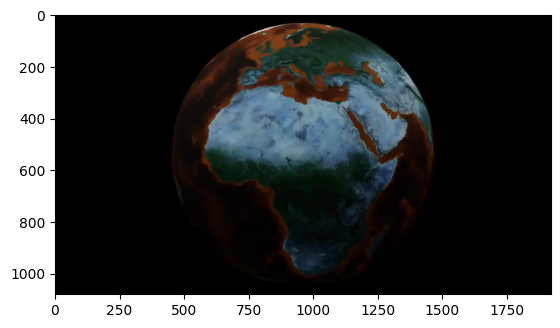

In [33]:
import cv2
image=cv2.imread('/content/Test_Earth/Earth/Earth.jpg')
plt.imshow(image)
plt.show()
image=cv2.resize(image,(224,224))

image=image/255.0

In [30]:
c=model.predict(image.reshape(1,224,224,3))

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 956ms/step


In [34]:
import numpy as np
a=np.argmax(c)

In [35]:
def predicton(c):
  if (c==0):
    print("Earth")
  elif (c==1):
    print("Jupiter")
  elif (c==2):
    print("MakeMake")
  elif (c==3):
    print("Mars")
  elif (c==4):
    print("Mercury")
  elif (c==5):
    print("Moon")
  elif (c==6):
    print("Neptune")
  elif (c==7):
    print("Pluto")
  elif (c==8):
    print("Saturn")
  elif (c==9):
    print("Uranus")
  elif (c==10):
    print("Venus")
  else:
    print("This planet is difficult to predict")



In [36]:
predicton(a)

Earth


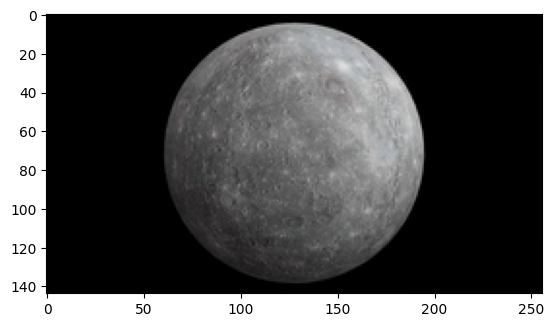

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


In [46]:
image1=cv2.imread('/content/Planets_Moons_Data/Planets and Moons/Mercury/Mercury (1).jpg')
plt.imshow(image1)
plt.show()
image1=cv2.resize(image1,(224,224))
image1=image1/255.0
p=model.predict(image1.reshape(1,224,224,3))

In [48]:
d=np.argmax(p)

In [49]:
predicton(d)

Mercury
